<a href="https://colab.research.google.com/github/Ashraf1292/Thesis-Fake_jobs-/blob/main/97_f-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.25

In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


In [3]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTENC
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import random
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Download necessary NLTK resources
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('corpora/wordnet')
    # Explicitly check for the English version of the tagger
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    print("Downloading NLTK resources...")
    nltk.download('punkt')
    nltk.download('punkt_tab') # Note: punkt_tab is not a standard NLTK data package, likely a typo
    nltk.download('stopwords')
    nltk.download('averaged_perceptron_tagger')
    # Download the specific English tagger required by pos_tag('eng')
    nltk.download('averaged_perceptron_tagger_eng')
    nltk.download('wordnet')
    nltk.download('omw-1.4')  # Open Multilingual WordNet
    print("NLTK resources downloaded.")

# It appears there might be a typo with 'punkt_tab'. Let's remove it
# from the downloads as it's not a standard NLTK data package and might cause issues.

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('corpora/wordnet')
    # Explicitly check for the English version of the tagger
    nltk.data.find('taggers/averaged_perceptron_tagger_eng')
except LookupError:
    print("Downloading NLTK resources...")
    nltk.download('punkt')
    # nltk.download('punkt_tab') # Removed as it's not a standard NLTK package
    nltk.download('stopwords')
    nltk.download('averaged_perceptron_tagger')
    # Download the specific English tagger required by pos_tag('eng')
    nltk.download('averaged_perceptron_tagger_eng')
    nltk.download('wordnet')
    nltk.download('omw-1.4')  # Open Multilingual WordNet
    print("NLTK resources downloaded.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...


NLTK resources downloaded.
NLTK resources downloaded.


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Loading data from fake_job_postings.csv...
Dataset loaded with shape: (17880, 18)

Data Overview:
Number of job posts: 17880
Number of features: 18
Class distribution:
- Legitimate jobs: 17014 (95.16%)
- Fraudulent jobs: 866 (4.84%)

Missing values:
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
dtype: int64

First 5 rows of the dataset:


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


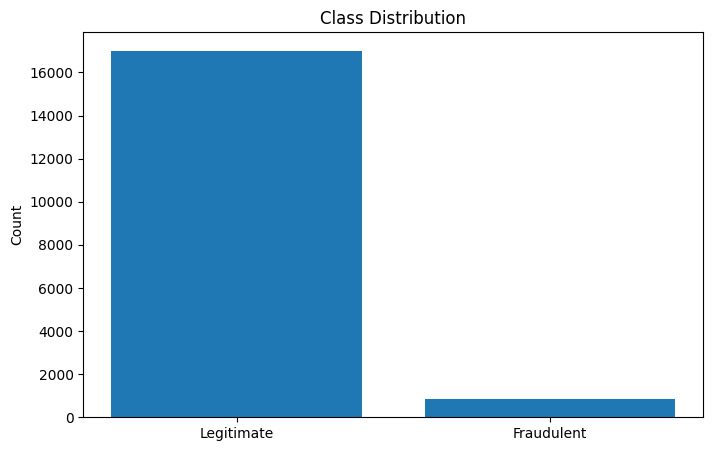

In [6]:
def load_data(filepath):
    """Load the dataset and perform initial exploration"""
    print(f"Loading data from {filepath}...")
    df = pd.read_csv(filepath)
    print(f"Dataset loaded with shape: {df.shape}")

    # Display basic info
    print("\nData Overview:")
    print(f"Number of job posts: {len(df)}")
    print(f"Number of features: {len(df.columns)}")

    # Identify target column (could be 'fraudulent', 'fake', etc.)
    target_column = None
    if 'fraudulent' in df.columns:
        target_column = 'fraudulent'
    elif 'fake' in df.columns:
        target_column = 'fake'
    else:
        # Try to find a binary column that might represent fraud
        binary_cols = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1}) and len(df[col].dropna().unique()) == 2]
        if binary_cols:
            # Pick the first binary column as target
            target_column = binary_cols[0]
            print(f"Assuming '{target_column}' is the target column (binary values detected)")
        else:
            print("No clear target column found. Please rename your target column to 'fraudulent'.")
            # Create a dummy target for demonstration
            df['fraudulent'] = 0
            target_column = 'fraudulent'

    # Check class distribution
    if target_column:
        fraud_count = df[target_column].sum()
        print(f"Class distribution:")
        print(f"- Legitimate jobs: {len(df) - fraud_count} ({(len(df) - fraud_count) / len(df):.2%})")
        print(f"- Fraudulent jobs: {fraud_count} ({fraud_count / len(df):.2%})")

        # Rename target column to 'fraudulent' if it's not already named that
        if target_column != 'fraudulent':
            df['fraudulent'] = df[target_column]
            print(f"Renamed target column from '{target_column}' to 'fraudulent'")

    # Check for necessary text columns and rename if needed
    expected_text_columns = ['title', 'description', 'requirements', 'benefits']
    for col in expected_text_columns:
        if col not in df.columns:
            similar_cols = [c for c in df.columns if col in c.lower()]
            if similar_cols:
                df[col] = df[similar_cols[0]]
                print(f"Using '{similar_cols[0]}' as '{col}' column")
            else:
                print(f"Warning: '{col}' column not found and no similar column detected")
                df[col] = ""  # Create empty column

    # Checking for missing values
    missing_vals = df.isnull().sum()
    print("\nMissing values:")
    print(missing_vals[missing_vals > 0])

    return df

# Load the dataset and display basic information
dataset_path = "fake_job_postings.csv"
df = load_data(dataset_path)

# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Visualize class distribution
plt.figure(figsize=(8, 5))
class_counts = df['fraudulent'].value_counts()
plt.bar(['Legitimate', 'Fraudulent'], [class_counts.get(0, 0), class_counts.get(1, 0)])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.show()

In [7]:
def preprocess_text(text, lemmatize=True):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""

    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Lemmatization
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNet"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def advanced_preprocess(text, include_pos=True):
    """Enhanced preprocessing with POS tagging"""
    if pd.isna(text):
        return ""

    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # POS tagging and lemmatization
    lemmatizer = WordNetLemmatizer()
    if include_pos:
        tagged_tokens = nltk.pos_tag(tokens)
        processed_tokens = []
        for word, tag in tagged_tokens:
            wntag = get_wordnet_pos(word)
            processed_tokens.append(lemmatizer.lemmatize(word, wntag))
        return " ".join(processed_tokens)
    else:
        return " ".join([lemmatizer.lemmatize(word) for word in tokens])

# Test preprocessing on a sample text from the dataset
sample_text = df['description'].dropna().iloc[0] if 'description' in df.columns and not df['description'].isna().all() else "Sample job description for testing"
print("Original text sample:")
print(sample_text[:300] + "..." if len(sample_text) > 300 else sample_text)

print("\nPreprocessed text (basic):")
basic_processed = preprocess_text(sample_text)
print(basic_processed[:300] + "..." if len(basic_processed) > 300 else basic_processed)

print("\nPreprocessed text (advanced with POS tagging):")
advanced_processed = advanced_preprocess(sample_text)
print(advanced_processed[:300] + "..." if len(advanced_processed) > 300 else advanced_processed)

Original text sample:
Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackagi...

Preprocessed text (basic):
james beard online food community curated recipe hub currently interviewing unpaid intern work small team editor executive developer new york city repackaging existing content number partner site huffington post yahoo buzzfeed various content management systemsresearching blog website provision affi...

Preprocessed text (advanced with POS tagging):
james beard online food community curated recipe hub currently interview unpaid intern work small team editor executive developer new york city repackaging exist content number partner site huffington post yahoo buzzfeed various content management systemsresearching blog website provision affi

In [8]:
def extract_ruleset_features(df):
    """Extract rule-based features from job descriptions"""
    print("Extracting rule-based features...")

    # Initialize new feature columns
    df['desc_length'] = df['description'].fillna('').apply(len)
    df['req_length'] = df['requirements'].fillna('').apply(len)
    df['title_length'] = df['title'].fillna('').apply(len)

    # Calculate text-to-salary ratio (if salary is available)
    if 'salary_range' in df.columns:
        df['has_salary'] = df['salary_range'].notna().astype(int)

    # Number of uppercase words (potential red flag for fake jobs)
    df['uppercase_ratio'] = df['description'].fillna('').apply(
        lambda x: sum(1 for word in x.split() if word.isupper()) / len(x.split()) if len(x.split()) > 0 else 0
    )

    # Check for contact information in description (often seen in fake jobs)
    df['has_email_in_desc'] = df['description'].fillna('').str.contains(
        r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', regex=True).astype(int)

    # Check for urgency words (potential red flag)
    urgency_words = ['urgent', 'immediately', 'asap', 'hurry', 'quick', 'fast', 'rapid']
    df['urgency_count'] = df['description'].fillna('').apply(
        lambda x: sum(x.lower().count(word) for word in urgency_words)
    )

    # Check for excessive punctuation (potential red flag)
    df['exclamation_count'] = df['description'].fillna('').str.count('!')

    return df

def create_tfidf_features(text_series, max_features=5000):
    """Transform text data into TF-IDF features"""
    print("Creating TF-IDF features...")
    vectorizer = TfidfVectorizer(
        max_features=max_features,
        min_df=5,  # Ignore terms that appear in less than 5 documents
        max_df=0.7,  # Ignore terms that appear in more than 70% of documents
        ngram_range=(1, 2)  # Include unigrams and bigrams
    )
    features = vectorizer.fit_transform(text_series)
    return features, vectorizer

def create_word2vec_features(text_series, vector_size=100, window=5, min_count=2):
    """Transform text data into Word2Vec features"""
    print("Creating Word2Vec features...")
    # Tokenize text for Word2Vec
    tokenized_texts = [text.split() for text in text_series if isinstance(text, str)]

    # Train Word2Vec model
    w2v_model = Word2Vec(
        sentences=tokenized_texts,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=4
    )

    # Create document vectors by averaging word vectors
    doc_vectors = []
    for text in text_series:
        if not isinstance(text, str) or not text:
            # Handle empty or non-string inputs
            doc_vectors.append(np.zeros(vector_size))
            continue

        tokens = text.split()
        token_vectors = []
        for token in tokens:
            if token in w2v_model.wv:
                token_vectors.append(w2v_model.wv[token])

        if token_vectors:
            doc_vector = np.mean(token_vectors, axis=0)
        else:
            doc_vector = np.zeros(vector_size)

        doc_vectors.append(doc_vector)

    return np.array(doc_vectors), w2v_model

# Apply preprocessing to text columns
text_columns = ['title', 'description', 'requirements', 'benefits']
for col in text_columns:
    if col in df.columns and not df[col].isna().all():
        print(f"\nPreprocessing {col}...")
        df[f'{col}_processed'] = df[col].apply(advanced_preprocess)

        # Show a sample of processed text
        if not df[f'{col}_processed'].isna().all():
            print(f"Sample processed {col}:")
            sample = df[f'{col}_processed'].dropna().iloc[0]
            print(sample[:200] + "..." if len(sample) > 200 else sample)

# Extract ruleset features
df = extract_ruleset_features(df)

# Show a summary of the ruleset features
print("\nSummary of ruleset features:")
ruleset_features = ['desc_length', 'req_length', 'title_length', 'uppercase_ratio',
                   'has_email_in_desc', 'urgency_count', 'exclamation_count']
print(df[ruleset_features].describe())

# Combine processed text columns
df['combined_text'] = ''
for col in text_columns:
    processed_col = f'{col}_processed'
    if processed_col in df.columns:
        df['combined_text'] += df[processed_col].fillna('') + ' '
df['combined_text'] = df['combined_text'].str.strip()

print("\nSample combined text:")
print(df['combined_text'].iloc[0][:200] + "..." if len(df['combined_text'].iloc[0]) > 200 else df['combined_text'].iloc[0])


Preprocessing title...
Sample processed title:
marketing intern

Preprocessing description...
Sample processed description:
james beard online food community curated recipe hub currently interview unpaid intern work small team editor executive developer new york city repackaging exist content number partner site huffington...

Preprocessing requirements...
Sample processed requirements:
experience content management system major plus blogging count familiar editorial voice aestheticloves food appreciates importance home cooking cooking seasonsmeticulous editor perfectionist obsessive...

Preprocessing benefits...
Sample processed benefits:

Extracting rule-based features...

Summary of ruleset features:
        desc_length    req_length  title_length  uppercase_ratio  \
count  17880.000000  17880.000000  17880.000000     17880.000000   
mean    1218.004418    590.132215     28.530313         0.017277   
std      894.828620    613.191270     13.871256         0.037361   
min        0.0

In [9]:
def get_synonyms(word):
    """Get synonyms for a word using WordNet"""
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

def augment_text(text, n_aug=1, p_replace=0.2):
    """Generate augmented versions of text using synonym replacement"""
    if pd.isna(text) or not text:
        return []

    augmented_texts = []
    words = text.split()

    for _ in range(n_aug):
        new_words = words.copy()
        # Calculate number of words to replace
        n_replace = max(1, int(len(words) * p_replace))

        # Choose random words to replace
        replace_idx = random.sample(range(len(words)), min(n_replace, len(words)))

        for idx in replace_idx:
            word = words[idx]
            synonyms = get_synonyms(word)
            # Only replace if there are synonyms available
            if synonyms and len(synonyms) > 0:
                new_words[idx] = random.choice(synonyms)

        augmented_texts.append(" ".join(new_words))

    return augmented_texts

def augment_dataset(df, text_columns, target_column, n_aug_per_fake=3):
    """Augment fraudulent job posts to address class imbalance"""
    print("Augmenting the dataset...")
    fake_indices = df[df[target_column] == 1].index
    augmented_rows = []

    for idx in fake_indices:
        row = df.loc[idx].copy()
        for col in text_columns:
            processed_col = f'{col}_processed'
            if processed_col in df.columns and pd.notna(row[processed_col]) and isinstance(row[processed_col], str):
                augmented_texts = augment_text(row[processed_col], n_aug=n_aug_per_fake)

                # Create new rows with augmented text
                for i, aug_text in enumerate(augmented_texts):
                    new_row = row.copy()
                    new_row[processed_col] = aug_text
                    augmented_rows.append(new_row)

    # Create dataframe from augmented rows and combine with original
    if augmented_rows:
        augmented_df = pd.DataFrame(augmented_rows)
        print(f"Added {len(augmented_df)} augmented examples")
        return pd.concat([df, augmented_df], ignore_index=True)
    else:
        return df

# Test augmentation on a sample text
sample_text = df['description_processed'].dropna().iloc[0] if 'description_processed' in df.columns else "sample text for augmentation testing"
print("Original text:")
print(sample_text[:100] + "..." if len(sample_text) > 100 else sample_text)

print("\nAugmented versions:")
augmented_samples = augment_text(sample_text, n_aug=2)
for i, sample in enumerate(augmented_samples):
    print(f"Version {i+1}:")
    print(sample[:100] + "..." if len(sample) > 100 else sample)

# Augment the dataset
# Note: In a real pipeline, you might want to apply this after splitting off a test set
# to avoid data leakage. For demonstration, we'll apply it to the full dataset.
print("\nAugmenting fraudulent job postings...")
text_cols_processed = [f'{col}_processed' for col in text_columns if f'{col}_processed' in df.columns]
augmented_df = augment_dataset(df, text_cols_processed, 'fraudulent', n_aug_per_fake=2)

# Show class distribution after augmentation
print("\nClass distribution after augmentation:")
print(augmented_df['fraudulent'].value_counts())

Original text:
james beard online food community curated recipe hub currently interview unpaid intern work small te...

Augmented versions:
Version 1:
james face_fungus online food community curated recipe hub currently interview unpaid intern work sm...
Version 2:
james beard online food_for_thought community curated recipe hub currently audience unpaid intern wo...

Augmenting fraudulent job postings...
Augmenting the dataset...

Class distribution after augmentation:
fraudulent
0    17014
1      866
Name: count, dtype: int64


Creating TF-IDF features from the combined text...
Creating TF-IDF features...
Final feature matrix shape: (17880, 5007)
Training set shape: (14304, 5007)
Testing set shape: (3576, 5007)
Applying SMOTE to balance classes...
Original class distribution: [13611   693]
Resampled class distribution: [13611 13611]
Resampled training set shape: (27222, 5007)


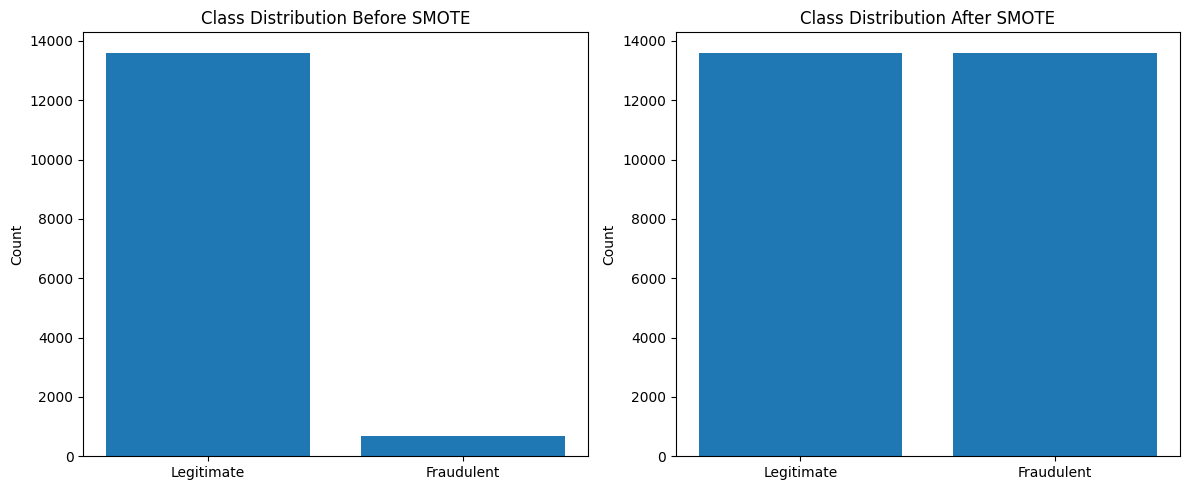

In [10]:
def apply_smote(X, y, categorical_features=None):
    """Apply SMOTE for handling class imbalance""" # Changed function description
    print("Applying SMOTE to balance classes...")
    # If no categorical features specified, assume all are numerical
    # SMOTE is designed for purely numerical features

    # Import SMOTE from imblearn.over_sampling
    from imblearn.over_sampling import SMOTE # Added import

    # Use SMOTE instead of SMOTE-NC
    smote = SMOTE(random_state=42) # Changed SMOTENC to SMOTE
    X_resampled, y_resampled = smote.fit_resample(X, y) # Changed smote_nc to smote

    print(f"Original class distribution: {np.bincount(y)}")
    print(f"Resampled class distribution: {np.bincount(y_resampled)}")

    return X_resampled, y_resampled

# Let's extract features from the combined_text for TF-IDF
print("Creating TF-IDF features from the combined text...")
text_features, vectorizer = create_tfidf_features(augmented_df['combined_text'])
text_features = text_features.toarray()  # Convert sparse matrix to numpy array

# Get numerical features for the model
numerical_features = ['desc_length', 'req_length', 'title_length',
                      'uppercase_ratio', 'has_email_in_desc',
                      'urgency_count', 'exclamation_count']
numerical_features = [col for col in numerical_features if col in augmented_df.columns]

# Combine text and numerical features
X_numerical = augmented_df[numerical_features].values
X = np.hstack((text_features, X_numerical))
y = augmented_df['fraudulent'].values

print(f"Final feature matrix shape: {X.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Apply SMOTE to the training data
# No need to pass categorical_features since X_train is now treated as purely numerical for SMOTE
X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

print(f"Resampled training set shape: {X_train_resampled.shape}")

# Visualize class distribution before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(['Legitimate', 'Fraudulent'], [np.sum(y_train == 0), np.sum(y_train == 1)])
plt.title('Class Distribution Before SMOTE')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(['Legitimate', 'Fraudulent'], [np.sum(y_train_resampled == 0), np.sum(y_train_resampled == 1)])
plt.title('Class Distribution After SMOTE')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
def train_and_tune_models(X, y):
    """Train and tune different models using grid search and cross-validation"""
    print("Training and tuning models...")

    # Define models to test
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }

    # Define hyperparameter grids
    param_grids = {
        'Random Forest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'class_weight': ['balanced', None]
        },
        'Gradient Boosting': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear'],
            'gamma': ['scale', 'auto'],
            'class_weight': ['balanced', None]
        }
    }

    # For demonstration, use a smaller parameter grid to speed up execution
    demo_param_grids = {
        'Random Forest': {
            'n_estimators': [100],
            'max_depth': [10],
            'class_weight': ['balanced']
        },
        'Gradient Boosting': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3]
        },
        'SVM': {
            'C': [1],
            'kernel': ['rbf'],
            'class_weight': ['balanced']
        }
    }

    # Use the demo grids for faster execution in this notebook
    param_grids = demo_param_grids

    # Perform nested cross-validation
    best_models = {}
    best_scores = {}
    cv_outer = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Use 3 folds for demo

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")

        # Store scores across outer CV folds
        outer_scores = []
        best_inner_models = []

        for train_idx, test_idx in cv_outer.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Inner CV for hyperparameter tuning
            cv_inner = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # Use 2 folds for demo
            grid_search = GridSearchCV(
                model,
                param_grids[model_name],
                scoring='f1',
                cv=cv_inner,
                n_jobs=-1
            )

            # Fit on the training set
            grid_search.fit(X_train, y_train)

            # Get best model from inner CV
            best_model = grid_search.best_estimator_
            best_inner_models.append((best_model, grid_search.best_params_))

            # Evaluate on the test set
            y_pred = best_model.predict(X_test)
            outer_scores.append(f1_score(y_test, y_pred))

        # Calculate average score across outer CV folds
        avg_score = np.mean(outer_scores)
        best_scores[model_name] = avg_score

        # Get overall best parameters by frequency
        param_counts = {}
        for model, params in best_inner_models:
            param_str = str(params)
            param_counts[param_str] = param_counts.get(param_str, 0) + 1

        most_frequent_params = max(param_counts.items(), key=lambda x: x[1])[0]
        print(f"Best params for {model_name}: {eval(most_frequent_params)}")

        # Train final model with most frequent best parameters
        final_model = models[model_name].set_params(**eval(most_frequent_params))
        final_model.fit(X, y)
        best_models[model_name] = final_model

        print(f"{model_name} average F1 score: {avg_score:.4f}")

    # Determine overall best model
    best_model_name = max(best_scores, key=best_scores.get)
    print(f"\nBest overall model: {best_model_name} with F1 score: {best_scores[best_model_name]:.4f}")

    return best_models, best_scores

# Train models using the resampled data
print("Training models with nested cross-validation...")
best_models, best_scores = train_and_tune_models(X_train_resampled, y_train_resampled)

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(best_scores.keys(), best_scores.values())
plt.ylabel('F1 Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Training models with nested cross-validation...
Training and tuning models...

Training Random Forest...
Best params for Random Forest: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
Random Forest average F1 score: 0.9466

Training Gradient Boosting...
Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting average F1 score: 0.9741

Training SVM...


In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Best Model"):
    """Evaluate model performance with various metrics"""
    print(f"\nEvaluating {model_name}...")
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Calculate accuracy
    accuracy = (y_pred == y_test).mean()

    # Print additional metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

    # Plot Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        'accuracy': accuracy,
        'f1_score': f1_score(y_test, y_pred),
        'pr_auc': pr_auc,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall
    }

Training Gradient Boosting model with nested cross-validation...
Training and tuning Gradient Boosting model...

Training Gradient Boosting...
Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting average F1 score: 0.9741

Gradient Boosting F1 score: 0.9741


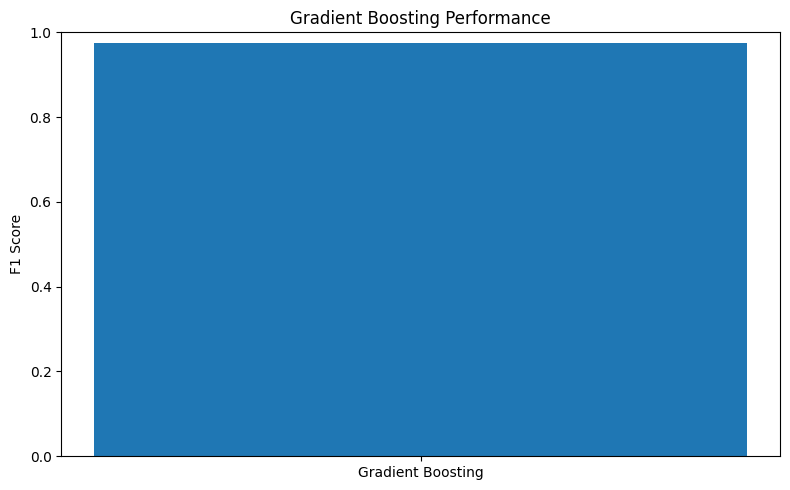

In [11]:
def train_and_tune_models(X, y):
    """Train and tune Gradient Boosting model using grid search and cross-validation"""
    print("Training and tuning Gradient Boosting model...")

    # Define model to test
    models = {
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }

    # Define hyperparameter grid
    param_grids = {
        'Gradient Boosting': {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.8, 1.0]
        }
    }

    # For demonstration, use a smaller parameter grid to speed up execution
    demo_param_grids = {
        'Gradient Boosting': {
            'n_estimators': [100],
            'learning_rate': [0.1],
            'max_depth': [3]
        }
    }

    # Use the demo grids for faster execution in this notebook
    param_grids = demo_param_grids

    # Perform nested cross-validation
    best_models = {}
    best_scores = {}
    cv_outer = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Use 3 folds for demo

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")

        # Store scores across outer CV folds
        outer_scores = []
        best_inner_models = []

        for train_idx, test_idx in cv_outer.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Inner CV for hyperparameter tuning
            cv_inner = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # Use 2 folds for demo
            grid_search = GridSearchCV(
                model,
                param_grids[model_name],
                scoring='f1',
                cv=cv_inner,
                n_jobs=-1
            )

            # Fit on the training set
            grid_search.fit(X_train, y_train)

            # Get best model from inner CV
            best_model = grid_search.best_estimator_
            best_inner_models.append((best_model, grid_search.best_params_))

            # Evaluate on the test set
            y_pred = best_model.predict(X_test)
            outer_scores.append(f1_score(y_test, y_pred))

        # Calculate average score across outer CV folds
        avg_score = np.mean(outer_scores)
        best_scores[model_name] = avg_score

        # Get overall best parameters by frequency
        param_counts = {}
        for model, params in best_inner_models:
            param_str = str(params)
            param_counts[param_str] = param_counts.get(param_str, 0) + 1

        most_frequent_params = max(param_counts.items(), key=lambda x: x[1])[0]
        print(f"Best params for {model_name}: {eval(most_frequent_params)}")

        # Train final model with most frequent best parameters
        final_model = models[model_name].set_params(**eval(most_frequent_params))
        final_model.fit(X, y)
        best_models[model_name] = final_model

        print(f"{model_name} average F1 score: {avg_score:.4f}")

    # Since we only have one model, it's automatically the best
    best_model_name = list(best_scores.keys())[0]
    print(f"\nGradient Boosting F1 score: {best_scores[best_model_name]:.4f}")

    return best_models, best_scores

# Train models using the resampled data
print("Training Gradient Boosting model with nested cross-validation...")
best_models, best_scores = train_and_tune_models(X_train_resampled, y_train_resampled)

# Visualize model performance
plt.figure(figsize=(8, 5))
plt.bar(best_scores.keys(), best_scores.values())
plt.ylabel('F1 Score')
plt.title('Gradient Boosting Performance')
plt.ylim(0, 1.0)  # Set y-axis from 0 to 1 for better visualization
plt.tight_layout()
plt.show()


Evaluating Gradient Boosting model on test set...

Evaluating Gradient Boosting...
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3403
           1       0.67      0.62      0.64       173

    accuracy                           0.97      3576
   macro avg       0.82      0.80      0.81      3576
weighted avg       0.97      0.97      0.97      3576

Accuracy: 0.9667
Precision-Recall AUC: 0.7077


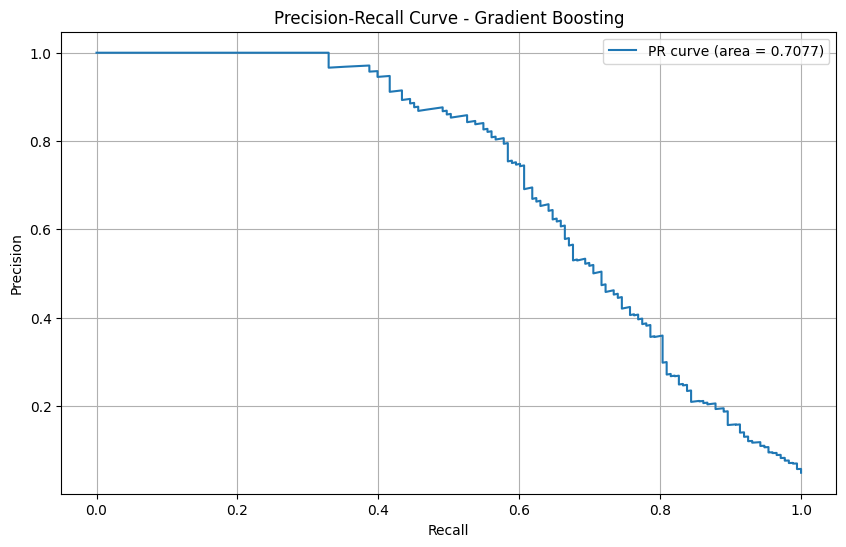

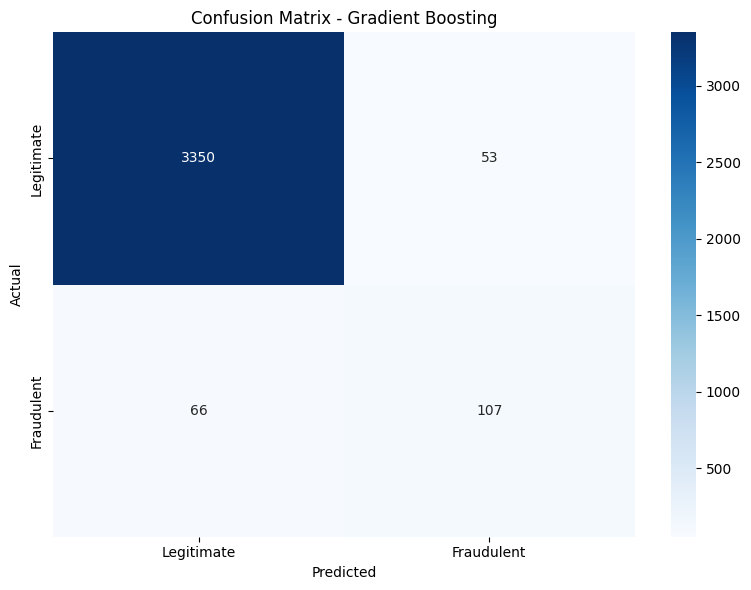

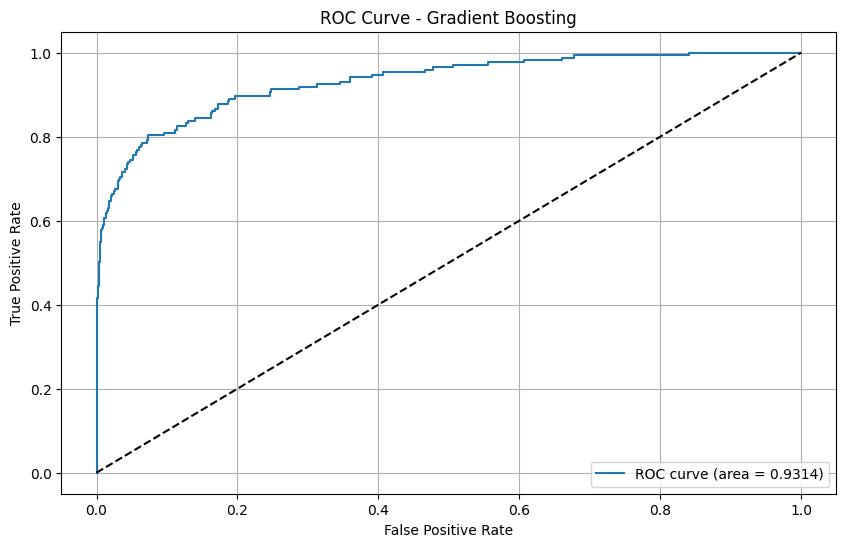


Gradient Boosting Performance Metrics:
Accuracy: 0.9667
F1 Score: 0.6426
Precision-Recall AUC: 0.7077
ROC AUC: 0.9314

Feature Importance for Gradient Boosting:


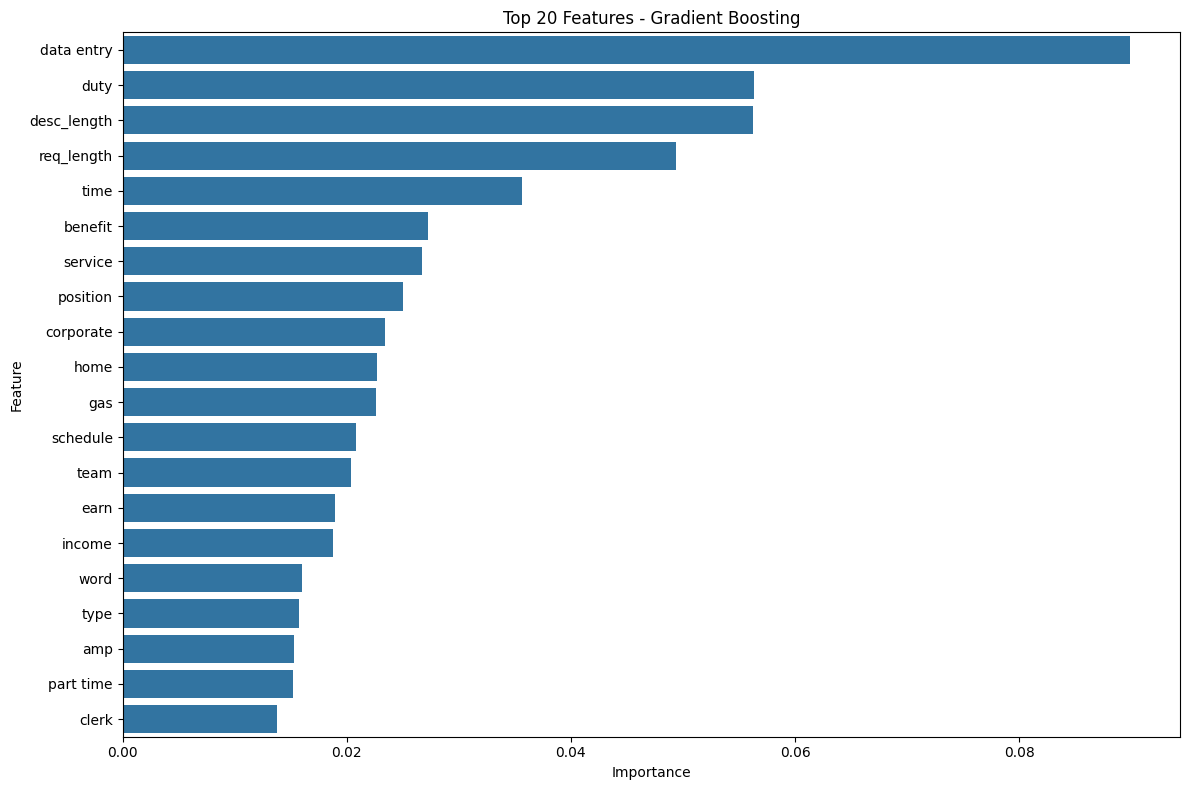


Gradient Boosting model saved to 'fraud_detection_model/' directory.
You can now use this model to predict fraudulent job postings!


In [12]:
# Complete the imports
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, f1_score

def evaluate_model(model, X_test, y_test, model_name="Best Model"):
    """Evaluate model performance with various metrics"""
    print(f"\nEvaluating {model_name}...")
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)

    # Calculate accuracy
    accuracy = (y_pred == y_test).mean()

    # Print additional metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

    # Plot Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        'accuracy': accuracy,
        'f1_score': f1_score(y_test, y_pred),
        'pr_auc': pr_auc,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall
    }

# Evaluate the Gradient Boosting model on the test set
print("\nEvaluating Gradient Boosting model on test set...")
gb_model = best_models['Gradient Boosting']
metrics = evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")

# Display the metrics in a more readable format
print("\nGradient Boosting Performance Metrics:")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"F1 Score: {metrics['f1_score']:.4f}")
print(f"Precision-Recall AUC: {metrics['pr_auc']:.4f}")
print(f"ROC AUC: {metrics['roc_auc']:.4f}")

# Store the model for later use
best_model = gb_model

# Get feature importance for the Gradient Boosting model
print("\nFeature Importance for Gradient Boosting:")
# Combine text features (from vectorizer) and numerical features
feature_names = vectorizer.get_feature_names_out().tolist() + numerical_features
# Make sure we only use as many feature names as we have importance values
feature_importance = pd.DataFrame({
    'Feature': feature_names[:len(best_model.feature_importances_)],
    'Importance': best_model.feature_importances_
})
top_features = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 20 Features - Gradient Boosting')
plt.tight_layout()
plt.show()

# Function to predict on new job postings using the Gradient Boosting model
def predict_job_posting(model, vectorizer, text_preprocessor, job_title, job_description,
                        job_requirements="", job_benefits=""):
    """Predict if a job posting is fraudulent using Gradient Boosting model"""
    # Preprocess text fields
    processed_title = text_preprocessor(job_title)
    processed_desc = text_preprocessor(job_description)
    processed_req = text_preprocessor(job_requirements)
    processed_benefits = text_preprocessor(job_benefits)

    # Combine processed text
    combined_text = f"{processed_title} {processed_desc} {processed_req} {processed_benefits}"

    # Create TF-IDF features
    text_features = vectorizer.transform([combined_text]).toarray()

    # Create ruleset features
    desc_length = len(job_description)
    req_length = len(job_requirements)
    title_length = len(job_title)
    uppercase_ratio = sum(1 for word in job_description.split() if word.isupper()) / len(job_description.split()) if len(job_description.split()) > 0 else 0
    has_email = 1 if re.search(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}', job_description) else 0
    urgency_words = ['urgent', 'immediately', 'asap', 'hurry', 'quick', 'fast', 'rapid']
    urgency_count = sum(job_description.lower().count(word) for word in urgency_words)
    exclamation_count = job_description.count('!')

    # Combine features
    numerical_features = np.array([[desc_length, req_length, title_length, uppercase_ratio,
                                  has_email, urgency_count, exclamation_count]])

    X = np.hstack((text_features, numerical_features))

    # Make prediction
    fraud_prob = model.predict_proba(X)[0, 1]
    is_fraud = model.predict(X)[0]

    return {
        'is_fraudulent': bool(is_fraud),
        'fraud_probability': fraud_prob,
        'risk_level': 'High' if fraud_prob > 0.7 else 'Medium' if fraud_prob > 0.3 else 'Low'
    }

# Example of usage (uncomment to use)
"""
sample_result = predict_job_posting(
    best_model,
    vectorizer,
    advanced_preprocess,
    job_title="Remote Data Entry Clerk - Work from Home!",
    job_description="URGENT! Make $5000/week working from home! No experience needed. \
    Just 2-3 hours per day! Contact us IMMEDIATELY at money4u@gmail.com!!!",
    job_requirements="No specific qualifications needed. Just be ready to work!",
    job_benefits="UNLIMITED income potential! Be your own boss!"
)
print("\nSample Prediction:")
print(f"Is fraudulent: {sample_result['is_fraudulent']}")
print(f"Fraud probability: {sample_result['fraud_probability']:.4f}")
print(f"Risk level: {sample_result['risk_level']}")
"""

# Save the best model and vectorizer for future use
import joblib

# Create a directory for the model if it doesn't exist
import os
if not os.path.exists('fraud_detection_model'):
    os.makedirs('fraud_detection_model')

# Save the Gradient Boosting model, vectorizer, and feature names
joblib.dump(best_model, 'fraud_detection_model/gradient_boosting_model.pkl')
joblib.dump(vectorizer, 'fraud_detection_model/vectorizer.pkl')
joblib.dump(numerical_features, 'fraud_detection_model/numerical_features.pkl')

print("\nGradient Boosting model saved to 'fraud_detection_model/' directory.")
print("You can now use this model to predict fraudulent job postings!")